In [203]:
## pip install lightgbm

In [204]:
## pip install catboost

In [205]:
## pip install ipywidgets

In [206]:
# pip install xgboost

In [207]:
import numpy as np
import pandas as pd
import lightgbm
from lightgbm import LGBMRegressor
import catboost
from catboost import CatBoostRegressor
import sklearn
from sklearn.model_selection import KFold
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
import IPython
from IPython.display import clear_output
import copy
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from tqdm import tqdm
import xgboost
from xgboost import XGBRegressor
from sklearn.cluster import KMeans

In [208]:
# import datasets
train = pd.read_csv('../dataset/train.csv')
test = pd.read_csv('../dataset/test.csv')
building = pd.read_csv('../dataset/building_info.csv')

In [209]:
display(train)
display(test)

,num_date_time,건물번호,일시,기온(C),강수량(mm),풍속(m/s),습도(%),일조(hr),일사(MJ/m2),전력소비량(kWh)
0,1_20220601 00,1,20220601 00,18.6,NaN,0.9,42.0,NaN,NaN,1085.28
1,1_20220601 01,1,20220601 01,18.0,NaN,1.1,45.0,NaN,NaN,1047.36
2,1_20220601 02,1,20220601 02,17.7,NaN,1.5,45.0,NaN,NaN,974.88
3,1_20220601 03,1,20220601 03,16.7,NaN,1.4,48.0,NaN,NaN,953.76
4,1_20220601 04,1,20220601 04,18.4,NaN,2.8,43.0,NaN,NaN,986.40
...,...,...,...,...,...,...,...,...,...,...
203995,100_20220824 19,100,20220824 19,23.1,NaN,0.9,86.0,0.5,NaN,881.04
203996,100_20220824 20,100,20220824 20,22.4,NaN,1.3,86.0,0.0,NaN,798.96
203997,100_20220824 21,100,20220824 21,21.3,NaN,1.0,92.0,NaN,NaN,825.12
203998,100_20220824 22,100,20220824 22,21.0,NaN,0.3,94.0,NaN,NaN,640.08


,num_date_time,건물번호,일시,기온(C),강수량(mm),풍속(m/s),습도(%)
0,1_20220825 00,1,20220825 00,23.5,0.0,2.2,72
1,1_20220825 01,1,20220825 01,23.0,0.0,0.9,72
2,1_20220825 02,1,20220825 02,22.7,0.0,1.5,75
3,1_20220825 03,1,20220825 03,22.1,0.0,1.3,78
4,1_20220825 04,1,20220825 04,21.8,0.0,1.0,77
...,...,...,...,...,...,...,...
16795,100_20220831 19,100,20220831 19,22.5,0.0,0.9,84
16796,100_20220831 20,100,20220831 20,20.7,0.0,0.4,95
16797,100_20220831 21,100,20220831 21,20.2,0.0,0.4,98
16798,100_20220831 22,100,20220831 22,20.1,0.0,1.1,97


In [210]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204000 entries, 0 to 203999
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   num_date_time  204000 non-null  object 
 1   건물번호           204000 non-null  int64  
 2   일시             204000 non-null  object 
 3   기온(C)          204000 non-null  float64
 4   강수량(mm)        43931 non-null   float64
 5   풍속(m/s)        203981 non-null  float64
 6   습도(%)          203991 non-null  float64
 7   일조(hr)         128818 non-null  float64
 8   일사(MJ/m2)      116087 non-null  float64
 9   전력소비량(kWh)     204000 non-null  float64
dtypes: float64(7), int64(1), object(2)
memory usage: 15.6+ MB


C:\Users\LIMJAE~1\AppData\Local\Temp/ipykernel_32484/3983262534.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(df, dtype=np.bool)
c:\Users\LimJaeSung\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 44148 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\Users\LimJaeSung\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 47932 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\Users\LimJaeSung\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 48264 missing from current font.
  font.set_text(

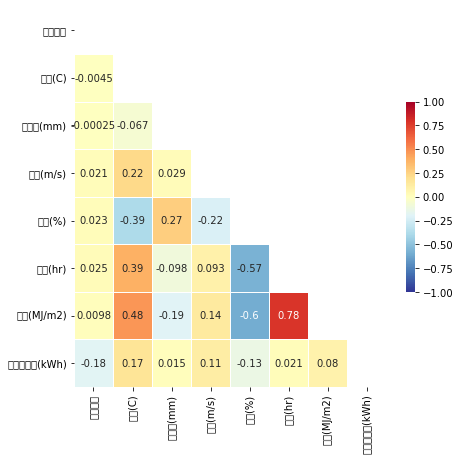

In [211]:
df = train.corr()

fig, ax = plt.subplots(figsize=(7,7))

mask = np.zeros_like(df, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# 히트맵
sns.heatmap(df, 
            cmap = 'RdYlBu_r', 
            annot = True,   # 실제 값을 표시한다
            mask=mask,      # 표시하지 않을 마스크 부분을 지정한다
            linewidths=.5,  # 경계면 실선으로 구분하기
            cbar_kws={"shrink": .5},# 컬러바 크기 절반으로 줄이기
            vmin = -1,vmax = 1   # 컬러바 범위 -1 ~ 1
           )  
plt.show()

In [212]:
train_df = train.copy()

train_df = train_df.drop(columns =  ['num_date_time', '일조(hr)', '일사(MJ/m2)', '강수량(mm)'])
train_df = train_df.rename(columns = {'기온(C)':'기온', '습도(%)':'습도', '풍속(m/s)' : '풍속', '전력소비량(kWh)':'전력소비량'})

In [213]:
# 결측치 처리
def fill_missing_with_avg(df, columns):
    for i in range(len(df)):
        if pd.isna(df.loc[i, columns]):
            prev_value = df.loc[i-1, columns]
            next_value = df.loc[i+1, columns]
            avg_value = (prev_value + next_value) / 2
            if pd.isna(prev_value) or pd.isna(next_value):
                building_num = df.loc[i,:]['건물번호']
                date = df.loc[i,:]['일시'][:8]
                avg_value = df[(df['건물번호'] == building_num) & (df['일시'].str.contains(date))][columns].mean()

            df.loc[i, columns] = avg_value

fill_missing_with_avg(train_df, '풍속')
fill_missing_with_avg(train_df, '습도')

In [214]:
## 일시 columns
train_df['일시'] = pd.to_datetime(train_df['일시'])
train_df['월'] = train_df['일시'].dt.month
train_df['일'] = train_df['일시'].dt.day
train_df['요일'] = train_df['일시'].dt.weekday
train_df['시간'] = train_df['일시'].dt.hour
train_df['날짜'] = train_df['일시'].dt.date

train_df['sin_요일'] = np.sin(2*np.pi*(train_df['요일'])/6)
train_df['cos_요일'] = np.cos(2*np.pi*(train_df['요일'])/6)
train_df['sin_시간'] = np.sin(2*np.pi*(train_df['시간'])/23)
train_df['cos_시간'] = np.cos(2*np.pi*(train_df['시간'])/23)
# train_df['sin_일'] = np.sin(2*np.pi*(train_df['일']-1)/30)
# train_df['cos_일'] = np.cos(2*np.pi*(train_df['일']-1)/30)
# train_df['일수'] = train_df['일시'].dt.dayofyear

train_df['휴일'] = train_df['요일'].isin([5,6]).astype(int)
train_df.loc[(train_df['월'] == 6) & (train_df['일'] == 6), '휴일'] = 1
train_df.loc[(train_df['월'] == 8) & (train_df['일'] == 15), '휴일'] = 1

cat_month = pd.get_dummies(train_df['월'])
train_df = pd.concat([train_df, cat_month], axis = 1)

In [215]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204000 entries, 0 to 203999
Data columns (total 19 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   건물번호    204000 non-null  int64         
 1   일시      204000 non-null  datetime64[ns]
 2   기온      204000 non-null  float64       
 3   풍속      204000 non-null  float64       
 4   습도      204000 non-null  float64       
 5   전력소비량   204000 non-null  float64       
 6   월       204000 non-null  int64         
 7   일       204000 non-null  int64         
 8   요일      204000 non-null  int64         
 9   시간      204000 non-null  int64         
 10  날짜      204000 non-null  object        
 11  sin_요일  204000 non-null  float64       
 12  cos_요일  204000 non-null  float64       
 13  sin_시간  204000 non-null  float64       
 14  cos_시간  204000 non-null  float64       
 15  휴일      204000 non-null  int32         
 16  6       204000 non-null  uint8         
 17  7       204000 non-null  uint

In [216]:
# train_df.set_index(train_df['일시'], inplace = True)
# train_df

In [217]:
# train_df['풍속'] = train_df['풍속'].interpolate(method = 'time')

In [218]:
# train_df['습도'] = train_df['습도'].interpolate(method = 'time')

In [219]:
# train_df['강수량'] = train_df['강수량'].interpolate(method = 'time')

In [220]:
# train_df = train_df.fillna(0)

In [221]:
# train_df.reset_index(drop = True, inplace = True)

In [222]:
# cat_month = pd.get_dummies(train_df['월'])
# train_df = pd.concat([train_df, cat_month], axis = 1).drop(columns = ['월'])

In [223]:
# 건물별, 요일별, 시간별 발전량 평균 넣어주기
weekday_mean = pd.pivot_table(train_df, values = '전력소비량', index = ['건물번호', '시간', '요일'], aggfunc = np.mean).reset_index()
tqdm.pandas()
train_df['요일별_평균'] = train_df.progress_apply(lambda x : weekday_mean.loc[(weekday_mean.건물번호 == x['건물번호']) & (weekday_mean.시간 == x['시간']) & (weekday_mean.요일 == x['요일']), '전력소비량'].values[0], axis = 1)

100%|██████████| 204000/204000 [01:26<00:00, 2354.51it/s]


In [224]:
# 건물별 시간, 요일별 발전량 표준편차 넣어주기
weekday_std = pd.pivot_table(train_df, values = '전력소비량', index = ['건물번호', '시간', '요일'], aggfunc = np.std).reset_index()
tqdm.pandas()
train_df['요일별_표준편차'] = train_df.progress_apply(lambda x : weekday_std.loc[(weekday_std.건물번호 == x['건물번호']) & (weekday_std.시간 == x['시간']) & (weekday_std.요일 == x['요일']) ,'전력소비량'].values[0], axis = 1)

100%|██████████| 204000/204000 [01:26<00:00, 2348.40it/s]


In [225]:
# 건물별 시간별 발전량 평균 넣어주기
hour_mean = pd.pivot_table(train_df, values = '전력소비량', index = ['건물번호', '시간'], aggfunc = np.mean).reset_index()
tqdm.pandas()
train_df['시간별_평균'] = train_df.progress_apply(lambda x : hour_mean.loc[(hour_mean.건물번호 == x['건물번호']) & (hour_mean.시간 == x['시간']) ,'전력소비량'].values[0], axis = 1)

100%|██████████| 204000/204000 [00:55<00:00, 3681.16it/s]


In [226]:
# 건물별 시간별 발전량 표준편차 넣어주기
hour_std = pd.pivot_table(train_df, values = '전력소비량', index = ['건물번호', '시간'], aggfunc = np.std).reset_index()
tqdm.pandas()
train_df['시간별_표준편차'] = train_df.progress_apply(lambda x : hour_std.loc[(hour_std.건물번호 == x['건물번호']) & (hour_std.시간 == x['시간']) ,'전력소비량'].values[0], axis = 1)

100%|██████████| 204000/204000 [00:57<00:00, 3568.01it/s]


In [227]:
# 파생변수 생성 - 열지수
train_df['기온(F)'] = (train_df['기온'] * 9/5) + 32
T = train_df['기온(F)']
RH = train_df['습도']
train_df['열지수'] = -42.379 + 2.04901523*T + 10.14333127*RH - .22475541*T*RH - .00683783*T*T - .05481717*RH*RH + .00122874*T*T*RH + .00085282*T*RH*RH - .00000199*T*T*RH*RH
# train_df['열지수'] = pd.cut(train_df['열지수'], bins = [0, 80, 90, 103, 124, 200], labels = [0, 1, 2, 3, 4])


(array([ 4423., 14707., 33221., 52404., 41295., 31996., 17516.,  7126.,
         1155.,   157.]),
 array([ 55.63234398,  61.99087681,  68.34940963,  74.70794245,
         81.06647528,  87.4250081 ,  93.78354092, 100.14207375,
        106.50060657, 112.8591394 , 119.21767222]),
 <BarContainer object of 10 artists>)

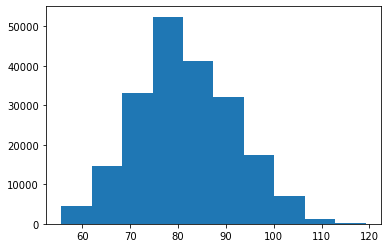

In [228]:
plt.hist(train_df['열지수'])

In [229]:
# 파생변수 생성 - 체감온도
# T = train_df['기온']
# W = train_df['풍속']
# train_df['체감온도'] = 13.12 + 0.6215*T - 11.37*(W)**0.16 + 0.3965*(W)**0.16*T

In [230]:
# plt.hist(train_df['체감온도'])

In [231]:
# 파생변수 생성 - 불쾌지수
T = 9/5*train_df['기온']
RH = train_df['습도']
train_df['불쾌지수'] = T - 0.55*(1-RH/100)*(T-26)+32
train_df['불쾌지수'] = pd.cut(train_df['불쾌지수'], bins = [0, 68, 75, 80, 200], labels = [0, 1, 2, 3])
discomfort = pd.get_dummies(train_df['불쾌지수'])
train_df = pd.concat([train_df, discomfort], axis = 1).rename(columns = {0:'불쾌지수_0', 1:'불쾌지수_1', 2:'불쾌지수_2', 3:'불쾌지수_3'})

In [232]:
train_df

,건물번호,일시,기온,풍속,습도,전력소비량,월,일,요일,시간,...,요일별_표준편차,시간별_평균,시간별_표준편차,기온(F),열지수,불쾌지수,불쾌지수_0,불쾌지수_1,불쾌지수_2,불쾌지수_3
0,1,2022-06-01 00:00:00,18.6,0.9,42.0,1085.28,6,1,2,0,...,517.982222,1706.318118,446.882767,65.48,78.408916,0,1,0,0,0
1,1,2022-06-01 01:00:00,18.0,1.1,45.0,1047.36,6,1,2,1,...,500.769931,1622.620235,439.662704,64.40,79.147251,0,1,0,0,0
2,1,2022-06-01 02:00:00,17.7,1.5,45.0,974.88,6,1,2,2,...,465.227458,1506.971294,412.071906,63.86,79.492837,0,1,0,0,0
3,1,2022-06-01 03:00:00,16.7,1.4,48.0,953.76,6,1,2,3,...,436.601091,1437.365647,391.205981,62.06,80.948219,0,1,0,0,0
4,1,2022-06-01 04:00:00,18.4,2.8,43.0,986.40,6,1,2,4,...,405.518091,1447.321412,381.099697,65.12,78.649811,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203995,100,2022-08-24 19:00:00,23.1,0.9,86.0,881.04,8,24,2,19,...,163.825489,1010.462118,161.399578,73.58,72.567800,1,0,1,0,0
203996,100,2022-08-24 20:00:00,22.4,1.3,86.0,798.96,8,24,2,20,...,153.076049,928.125176,137.566008,72.32,70.929804,1,0,1,0,0
203997,100,2022-08-24 21:00:00,21.3,1.0,92.0,825.12,8,24,2,21,...,143.415686,830.032941,128.300189,70.34,66.382661,1,0,1,0,0
203998,100,2022-08-24 22:00:00,21.0,0.3,94.0,640.08,8,24,2,22,...,105.147190,723.100235,112.464079,69.80,64.810657,1,0,1,0,0


In [233]:
# 파생변수 생성 - CDH
def CDH(x):
    y = []
    for i in range(len(x)):
        if i<11:
            y.append(np.sum(x[:(i+1)]-26))
        else:
            y.append(np.sum(x[(i-11):(i+1)]-26))
    return np.array(x)

In [234]:
cdhs = np.array([])

for num in range(1, 101):
    temp = train_df[train_df['건물번호'] == num]
    cdh = CDH(temp['기온'].values)
    cdhs = np.concatenate([cdhs, cdh])

train_df['CDH'] = cdhs

(array([  113.,  1349.,  8264., 12984., 31299., 62308., 51474., 27437.,
         8151.,   621.]),
 array([10.1, 12.8, 15.5, 18.2, 20.9, 23.6, 26.3, 29. , 31.7, 34.4, 37.1]),
 <BarContainer object of 10 artists>)

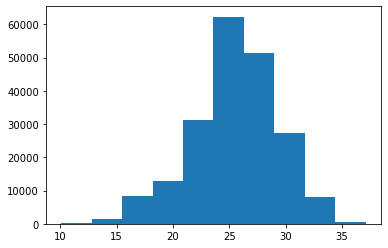

In [235]:
plt.hist(train_df['CDH'])

In [236]:
# 이상치 제거 -> 안하는게 나음
def detect_outliers(df,ratio): 
    outlier_indices = [] 
    Q1 = np.percentile(df, 25) 
    Q3 = np.percentile(df, 75) 
    IQR = Q3 - Q1 
    outlier_step = ratio * IQR 
    return ~(df < Q1 - outlier_step) | (df > Q3 + outlier_step)

# for i in range(100):    
#     idx = detect_outliers(train_target[i],1.25)
#     train_target[i] = train_target[i][idx]
#     train_input[i] = train_input[i][idx]


In [237]:
train_df.columns

Index([    '건물번호',       '일시',       '기온',       '풍속',       '습도',    '전력소비량',
              '월',        '일',       '요일',       '시간',       '날짜',   'sin_요일',
         'cos_요일',   'sin_시간',   'cos_시간',       '휴일',          6,          7,
                8,   '요일별_평균', '요일별_표준편차',   '시간별_평균', '시간별_표준편차',    '기온(F)',
            '열지수',     '불쾌지수',   '불쾌지수_0',   '불쾌지수_1',   '불쾌지수_2',   '불쾌지수_3',
            'CDH'],
      dtype='object')

In [238]:
train_df = train_df.drop(columns = ['일시', '일', '날짜', '기온(F)'])

In [239]:
# import matplotlib.gridspec as gridspec 

# grid = gridspec.GridSpec(12,2)
# fig = plt.figure(figsize = (20, 15))
# plt.subplots_adjust(wspace = 0.3, hspace = 0.2)

# for idx, feature in enumerate(train_df.columns[1:]):
#     ax = plt.subplot(grid[idx])
#     plt.hist(train_df[feature])
#     plt.title(f"{feature}")

In [240]:
# import matplotlib.gridspec as gridspec 

# grid = gridspec.GridSpec(7,1)
# fig = plt.figure(figsize = (20, 15))
# plt.subplots_adjust(wspace = 0.3, hspace = 0.2)

# for idx, feature in enumerate(['풍속', '습도', '전력소비량', '시간별_평균', '시간별_표준편차']):
#     ax = plt.subplot(grid[idx])
#     plt.hist(train_df[feature])
#     plt.title(f"{feature}")

In [241]:
train_df['log_풍속'] = np.log1p(train_df['풍속'])
train_df['log_전력소비량'] = np.log1p(train_df['전력소비량'])

train_df['log_요일별_평균'] = np.log1p(train_df['요일별_평균'])
train_df['log_요일별_표준편차'] = np.log1p(train_df['요일별_표준편차'])
train_df['log_시간별_평균'] = np.log1p(train_df['시간별_평균'])
train_df['log_시간별_표준편차'] = np.log1p(train_df['시간별_표준편차'])

In [242]:
# import matplotlib.gridspec as gridspec 

# grid = gridspec.GridSpec(6,1)
# fig = plt.figure(figsize = (20, 15))
# plt.subplots_adjust(wspace = 0.3, hspace = 0.2)

# for idx, feature in enumerate(['log_풍속', 'log_전력소비량', 'log_시간별_평균', 'log_시간별_표준편차']):
#     ax = plt.subplot(grid[idx])
#     plt.hist(train_df[feature])
#     plt.title(f"{feature}")

In [243]:
train_df

,건물번호,기온,풍속,습도,전력소비량,월,요일,시간,sin_요일,cos_요일,...,불쾌지수_1,불쾌지수_2,불쾌지수_3,CDH,log_풍속,log_전력소비량,log_요일별_평균,log_요일별_표준편차,log_시간별_평균,log_시간별_표준편차
0,1,18.6,0.9,42.0,1085.28,6,2,0,0.866025,-0.5,...,0,0,0,18.6,0.641854,6.990514,7.481975,6.251870,7.442679,6.104532
1,1,18.0,1.1,45.0,1047.36,6,2,1,0.866025,-0.5,...,0,0,0,18.0,0.741937,6.954982,7.431506,6.218142,7.392414,6.088280
2,1,17.7,1.5,45.0,974.88,6,2,2,0.866025,-0.5,...,0,0,0,17.7,0.916291,6.883340,7.360411,6.144674,7.318521,6.023622
3,1,16.7,1.4,48.0,953.76,6,2,3,0.866025,-0.5,...,0,0,0,16.7,0.875469,6.861460,7.328538,6.081308,7.271263,5.971787
4,1,18.4,2.8,43.0,986.40,6,2,4,0.866025,-0.5,...,0,0,0,18.4,1.335001,6.895075,7.318403,6.007628,7.278161,5.945682
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203995,100,23.1,0.9,86.0,881.04,8,2,19,0.866025,-0.5,...,1,0,0,23.1,0.641854,6.782237,6.873033,5.104887,6.919152,5.090060
203996,100,22.4,1.3,86.0,798.96,8,2,20,0.866025,-0.5,...,1,0,0,22.4,0.832909,6.684562,6.783534,5.037446,6.834243,4.931347
203997,100,21.3,1.0,92.0,825.12,8,2,21,0.866025,-0.5,...,1,0,0,21.3,0.693147,6.716740,6.659416,4.972696,6.722669,4.862137
203998,100,21.0,0.3,94.0,640.08,8,2,22,0.866025,-0.5,...,1,0,0,21.0,0.262364,6.463154,6.498685,4.664827,6.584930,4.731486


In [244]:
# plt.plot(train_df[['log_전력소비량']])
# # plt.plot(train_df[['log_요일별_평균']])
# plt.plot(train_df[['log_시간별_평균']])

In [245]:
train_df.columns

Index([        '건물번호',           '기온',           '풍속',           '습도',
              '전력소비량',            '월',           '요일',           '시간',
             'sin_요일',       'cos_요일',       'sin_시간',       'cos_시간',
                 '휴일',              6,              7,              8,
             '요일별_평균',     '요일별_표준편차',       '시간별_평균',     '시간별_표준편차',
                '열지수',         '불쾌지수',       '불쾌지수_0',       '불쾌지수_1',
             '불쾌지수_2',       '불쾌지수_3',          'CDH',       'log_풍속',
          'log_전력소비량',   'log_요일별_평균', 'log_요일별_표준편차',   'log_시간별_평균',
       'log_시간별_표준편차'],
      dtype='object')

In [246]:
# by_weekday = train_df.groupby(['건물번호','요일'])['전력소비량'].mean().reset_index().pivot('건물번호','요일','전력소비량').reset_index()
# by_hour = train_df.groupby(['건물번호','시간'])['전력소비량'].mean().reset_index().pivot('건물번호','시간','전력소비량').reset_index().drop('건물번호', axis = 1)
# df = pd.concat([by_weekday, by_hour], axis= 1)
# columns = ['건물번호'] + ['일'+str(i) for i in range(7)] + ['시간'+str(i) for i in range(24)]
# df.columns = columns

In [247]:
# for i in range(len(df)):
#     df.iloc[i, 1:8] = (df.iloc[i, 1:8] - df.iloc[i, 1:8].mean())/df.iloc[i, 1:8].std()
#     df.iloc[i, 8:] = (df.iloc[i, 8:] - df.iloc[i, 8:].mean())/df.iloc[i, 8:].std()


In [248]:
# # elbow 탐색
# def change_n_clusters(n_clusters, data):
#     sum_of_squared_distance = []
#     for n_cluster in n_clusters:
#         kmeans = KMeans(n_clusters=n_cluster)
#         kmeans.fit(data)
#         sum_of_squared_distance.append(kmeans.inertia_)
        
#     plt.figure(1 , figsize = (8, 5))
#     plt.plot(n_clusters , sum_of_squared_distance , 'o')
#     plt.plot(n_clusters , sum_of_squared_distance , '-' , alpha = 0.5)
#     plt.xlabel('Number of Clusters')
#     plt.ylabel('Inertia')

# change_n_clusters([2,3,4,5,6,7,8,9,10,11], df.iloc[:,1:])

# # k = 5로 결정

In [249]:
# kmeans = KMeans(n_clusters = 8, random_state= 42)
# km_cluster = kmeans.fit_predict(df.iloc[:, 1:])

# df_clust = df.copy()
# df_clust['km_cluster'] = km_cluster

In [250]:
# n_c = len(np.unique(df_clust.km_cluster)) 

# grid = gridspec.GridSpec(9, 2)
# plt.subplots_adjust(wspace = 0.2, hspace = 0.5)

# fig = plt.figure(figsize = (20, 8))
# for k in range(n_c):
#     temp = df_clust[df_clust.km_cluster == k]
#     plt.subplot(grid[2*k])
#     for i in range(len(temp)):
#         plt.plot(temp.iloc[i,1:8], linewidth=0.7)
#         plt.title(f'cluster{k}')
#         plt.xlabel('')
#         plt.xticks([])
#     plt.subplot(grid[2*k+1])
#     for i in range(len(temp)):
#         plt.plot(temp.iloc[i,8:-6], linewidth=0.7)
#         plt.title(f'cluster{k}')
#         plt.xlabel('')
#         plt.xticks([])

In [251]:
# df_clust

In [252]:
# df_clust.to_csv('../submission/cluster.csv', index = False)

In [253]:
# plt.hist(df_clust['km_cluster'])

In [254]:
# clust = df_clust[['건물번호', 'km_cluster']]
# train_df = pd.merge(train_df, clust)

In [255]:
train_df.columns

Index([        '건물번호',           '기온',           '풍속',           '습도',
              '전력소비량',            '월',           '요일',           '시간',
             'sin_요일',       'cos_요일',       'sin_시간',       'cos_시간',
                 '휴일',              6,              7,              8,
             '요일별_평균',     '요일별_표준편차',       '시간별_평균',     '시간별_표준편차',
                '열지수',         '불쾌지수',       '불쾌지수_0',       '불쾌지수_1',
             '불쾌지수_2',       '불쾌지수_3',          'CDH',       'log_풍속',
          'log_전력소비량',   'log_요일별_평균', 'log_요일별_표준편차',   'log_시간별_평균',
       'log_시간별_표준편차'],
      dtype='object')

In [472]:
train_df1 = train_df[['건물번호', 'log_전력소비량', '기온', '습도', 'log_풍속', 'sin_요일', 'cos_요일',
       'sin_시간', 'cos_시간', '휴일', '열지수', '불쾌지수_0', '불쾌지수_1', '불쾌지수_2', 'CDH',
       'log_요일별_평균', 'log_요일별_표준편차', 'log_시간별_평균', 'log_시간별_표준편차', 6, 7]]

train_df1s  = []
for i in range(1,101):
    train_df1s.append(train_df1[train_df1['건물번호'] == i])

for i in range(100):
    train_df1s[i] = train_df1s[i].drop(columns = ['건물번호'])

train_input1 = [] 
train_target1 = []
test_input1 = []
test_target1 = []

for i in range(len(train_df1s)):
    train_input1.append(copy.deepcopy(train_df1s[i][train_df1s[i].columns[1:]].iloc[:-24*7*2])) 
    train_target1.append(copy.deepcopy(train_df1s[i][train_df1s[i].columns[0]].iloc[:-24*7*2]))
    test_input1.append(copy.deepcopy(train_df1s[i][train_df1s[i].columns[1:]].iloc[-24*7*2:]))
    test_target1.append(copy.deepcopy(train_df1s[i][train_df1s[i].columns[0]].iloc[-24*7*2:]))

In [473]:
train_df2 = train_df[['건물번호', 'log_전력소비량', '기온', '습도', 'log_풍속', '월', 'sin_요일', 'cos_요일',
       'sin_시간', 'cos_시간', '휴일', '열지수', '불쾌지수', 'CDH',
       'log_시간별_평균', 'log_시간별_표준편차']]

train_df2s = []
for i in range(1,101):
    train_df2s.append(train_df2[train_df2['건물번호'] == i])    

for i in range(100):
    train_df2s[i] = train_df2s[i].drop(columns = ['건물번호'])

train_input2 = [] 
train_target2 = []
test_input2 = []
test_target2 = []

for i in range(len(train_df2s)):
    train_input2.append(copy.deepcopy(train_df2s[i][train_df2s[i].columns[1:]].iloc[:-24*7*2])) 
    train_target2.append(copy.deepcopy(train_df2s[i][train_df2s[i].columns[0]].iloc[:-24*7*2]))
    test_input2.append(copy.deepcopy(train_df2s[i][train_df2s[i].columns[1:]].iloc[-24*7*2:]))
    test_target2.append(copy.deepcopy(train_df2s[i][train_df2s[i].columns[0]].iloc[-24*7*2:]))

In [476]:
test

,num_date_time,건물번호,일시,기온(C),강수량(mm),풍속(m/s),습도(%)
0,1_20220825 00,1,20220825 00,23.5,0.0,2.2,72
1,1_20220825 01,1,20220825 01,23.0,0.0,0.9,72
2,1_20220825 02,1,20220825 02,22.7,0.0,1.5,75
3,1_20220825 03,1,20220825 03,22.1,0.0,1.3,78
4,1_20220825 04,1,20220825 04,21.8,0.0,1.0,77
...,...,...,...,...,...,...,...
16795,100_20220831 19,100,20220831 19,22.5,0.0,0.9,84
16796,100_20220831 20,100,20220831 20,20.7,0.0,0.4,95
16797,100_20220831 21,100,20220831 21,20.2,0.0,0.4,98
16798,100_20220831 22,100,20220831 22,20.1,0.0,1.1,97


In [259]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16800 entries, 0 to 16799
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   num_date_time  16800 non-null  object 
 1   건물번호           16800 non-null  int64  
 2   일시             16800 non-null  object 
 3   기온(C)          16800 non-null  float64
 4   강수량(mm)        16800 non-null  float64
 5   풍속(m/s)        16800 non-null  float64
 6   습도(%)          16800 non-null  int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 918.9+ KB


In [260]:
test_df = test.copy()

test_df = test_df.drop(columns =  ['num_date_time', '강수량(mm)'])
test_df = test_df.rename(columns = {'기온(C)':'기온', '풍속(m/s)':'풍속', '습도(%)':'습도'})

## 일시 columns
test_df['일시'] = pd.to_datetime(test_df['일시'])
test_df['월'] = test_df['일시'].dt.month
test_df['일'] = test_df['일시'].dt.day
test_df['요일'] = test_df['일시'].dt.weekday
test_df['시간'] = test_df['일시'].dt.hour
# test_df['날짜'] = test_df['일시'].dt.date

test_df['sin_요일'] = np.sin(2*np.pi*(test_df['요일'])/6)
test_df['cos_요일'] = np.cos(2*np.pi*(test_df['요일'])/6)
test_df['sin_시간'] = np.sin(2*np.pi*(test_df['시간'])/23)
test_df['cos_시간'] = np.cos(2*np.pi*(test_df['시간'])/23)
# test_df['sin_일'] = np.sin(2*np.pi*(test_df['일']-1)/30)
# test_df['cos_일'] = np.cos(2*np.pi*(test_df['일']-1)/30)
# test_df['일수'] = test_df['일시'].dt.dayofyear

test_df['휴일'] = test_df['요일'].isin([5,6]).astype(int)

# 파생변수 생성 - 열지수
test_df['기온(F)'] = (test_df['기온'] * 9/5) + 32
T = test_df['기온(F)']
RH = test_df['습도']
test_df['열지수'] = -42.379 + 2.04901523*T + 10.14333127*RH - .22475541*T*RH - .00683783*T*T - .05481717*RH*RH + .00122874*T*T*RH + .00085282*T*RH*RH - .00000199*T*T*RH*RH
# test_df['열지수'] = pd.cut(test_df['열지수'], bins = [0, 80, 90, 103, 124, 200], labels = [0, 1, 2, 3, 4])

# 파생변수 생성 - 체감온도
# T = test_df['기온']
# W = test_df['풍속']
# test_df['체감온도'] = 13.12 + 0.6215*T - 11.37*(W)**0.16 + 0.3965*(W)**0.16*T

# 파생변수 생성 - 불쾌지수
T = 9/5*test_df['기온']
RH = test_df['습도']
test_df['불쾌지수'] = T - 0.55*(1-RH/100)*(T-26)+32
test_df['불쾌지수'] = pd.cut(test_df['불쾌지수'], bins = [0, 68, 75, 80, 200], labels = [0, 1, 2, 3])
discomfort = pd.get_dummies(test_df['불쾌지수'])
test_df = pd.concat([test_df, discomfort], axis = 1).rename(columns = {0:'불쾌지수_0', 1:'불쾌지수_1', 2:'불쾌지수_2', 3:'불쾌지수_3'})

# 파생변수 생성 - CDH

cdhs = np.array([])
for num in range(1, 101):
    temp = test_df[test_df['건물번호'] == num]
    cdh = CDH(temp['기온'].values)
    cdhs = np.concatenate([cdhs, cdh])

test_df['CDH'] = cdhs

test_df['log_풍속'] = np.log1p(test_df['풍속'])

# 전력소비량 넣어주기
test_df['요일별_평균'] = test_df.progress_apply(lambda x : weekday_mean.loc[(weekday_mean.건물번호 == x['건물번호']) & (weekday_mean.시간 == x['시간']) & (weekday_mean.요일 == x['요일']), '전력소비량'].values[0], axis = 1)
test_df['요일별_표준편차'] = test_df.progress_apply(lambda x : weekday_std.loc[(weekday_std.건물번호 == x['건물번호']) & (weekday_std.시간 == x['시간']) & (weekday_std.요일 == x['요일']) ,'전력소비량'].values[0], axis = 1)
test_df['시간별_평균'] = test_df.progress_apply(lambda x : hour_mean.loc[(hour_mean.건물번호 == x['건물번호']) & (hour_mean.시간 == x['시간']) ,'전력소비량'].values[0], axis = 1)
test_df['시간별_표준편차'] = test_df.progress_apply(lambda x : hour_std.loc[(hour_std.건물번호 == x['건물번호']) & (hour_std.시간 == x['시간']) ,'전력소비량'].values[0], axis = 1)

test_df['log_요일별_평균'] = np.log1p(test_df['요일별_평균'])
test_df['log_요일별_표준편차'] = np.log1p(test_df['요일별_표준편차'])
test_df['log_시간별_평균'] = np.log1p(test_df['시간별_평균'])
test_df['log_시간별_표준편차'] = np.log1p(test_df['시간별_표준편차'])

test_df[6] = 0
test_df[7] = 0
test_df[6] = test_df[6].astype('uint8')
test_df[7] = test_df[7].astype('uint8')
cat_month = pd.get_dummies(test_df['월'])
test_df = pd.concat([test_df, cat_month], axis = 1)

100%|██████████| 16800/16800 [00:04<00:00, 3647.15it/s]


In [261]:
# test_df = pd.merge(test_df, clust)

In [262]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16800 entries, 0 to 16799
Data columns (total 34 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   건물번호          16800 non-null  int64         
 1   일시            16800 non-null  datetime64[ns]
 2   기온            16800 non-null  float64       
 3   풍속            16800 non-null  float64       
 4   습도            16800 non-null  int64         
 5   월             16800 non-null  int64         
 6   일             16800 non-null  int64         
 7   요일            16800 non-null  int64         
 8   시간            16800 non-null  int64         
 9   sin_요일        16800 non-null  float64       
 10  cos_요일        16800 non-null  float64       
 11  sin_시간        16800 non-null  float64       
 12  cos_시간        16800 non-null  float64       
 13  휴일            16800 non-null  int32         
 14  기온(F)         16800 non-null  float64       
 15  열지수           16800 non-null  float6

In [273]:
test_df1 = test_df[['건물번호', '기온', '습도', 'log_풍속', 'sin_요일', 'cos_요일', 
       'sin_시간', 'cos_시간', '휴일', '열지수', '불쾌지수_0', '불쾌지수_1', '불쾌지수_2', 'CDH',
       'log_요일별_평균', 'log_요일별_표준편차', 'log_시간별_평균', 'log_시간별_표준편차', 6, 7]]

test_input1_ = []
for i in range(1,101):
    test_input1_.append(test_df1[test_df1['건물번호']==i])

for i in range(100):
    test_input1_[i] = test_input1_[i].drop(columns = ['건물번호'])

test_df2 = test_df[['건물번호', '기온', '습도', '월', 'sin_요일', 'cos_요일',
       'sin_시간', 'cos_시간', '휴일', '열지수', '불쾌지수', 'CDH', 'log_풍속',
       'log_시간별_평균', 'log_시간별_표준편차']]

test_input2_  = []
for i in range(1, 101):
    test_input2_.append(test_df2[test_df2['건물번호']==i])

for i in range(100):
    test_input2_[i] = test_input2_[i].drop(columns = ['건물번호'])


In [264]:
# import matplotlib.gridspec as gridspec 

# grid = gridspec.GridSpec(12,2)
# fig = plt.figure(figsize = (20, 15))
# plt.subplots_adjust(wspace = 0.3, hspace = 0.2)

# for idx, feature in enumerate(test_df.columns):
#     ax = plt.subplot(grid[idx])
#     plt.hist(test_df[feature])
#     plt.title(f"{feature}")

In [266]:
K = [i for i in [5]]
catfeatures = ['월', '휴일', '불쾌지수']
random_seed = 42


In [477]:
preds = pd.DataFrame(index = range(0, 24*7*2*100), columns = {'ada', 'gbr', 'cat', 'lgb', 'real'}).fillna(0)

In [478]:
final = pd.DataFrame(index = range(0, 16800), columns = {'ada', 'gbr', 'cat', 'lgb'}).fillna(0)

In [479]:
ada_mae_params = {
    'n_estimators' : 10000,
    'learning_rate' : 0.01,
    'random_state' : random_seed,
}

for i in range(len(train_df1s)):
    print(i)
    model = AdaBoostRegressor(**ada_mae_params)
    model.fit(train_input1[i], train_target1[i])
    
    v = model.predict(test_input1[i][train_input1[i].columns])
    preds['ada'].iloc[(i)*24*7*2:(i+1)*24*7*2] += v
    
    v1 = model.predict(test_input1_[i][train_input1[i].columns])
    final['ada'].iloc[(i)*168:(i+1)*168] += v1
    
    clear_output(True)

99


In [480]:
GBR_mae_params = {
    'n_estimators' : 10000,
    'learning_rate' : 0.01,
    'random_state' : random_seed
}

for i in range(len(train_df1s)):
    print(i)
    model = GradientBoostingRegressor(**GBR_mae_params)
    model.fit(train_input1[i], train_target1[i])

    v = model.predict(test_input1[i][train_input1[i].columns])
    preds['gbr'].iloc[(i)*24*7*2:(i+1)*24*7*2] += v

    v1 = model.predict(test_input1_[i][train_input1[i].columns])
    final['gbr'].iloc[(i)*168:(i+1)*168] += v1
    clear_output(True)

99


In [482]:
preds['cat'] = 0
final['cat'] = 0

In [483]:
preds

,ada,real,cat,lgb,gbr
0,7.455077,0,0,0,7.547783
1,7.420955,0,0,0,7.427994
2,7.332445,0,0,0,7.343142
3,7.303890,0,0,0,7.372237
4,7.336393,0,0,0,7.388275
...,...,...,...,...,...
33595,6.776111,0,0,0,6.908484
33596,6.688539,0,0,0,6.793498
33597,6.637093,0,0,0,6.608557
33598,6.476953,0,0,0,6.489129


In [484]:
cat_mae_params = {
    'objective': 'MAE',
    'n_estimators': 10000, 
    'cat_features' : catfeatures,
    'one_hot_max_size' : 4
} # catboost hyper parameter

for i in range(len(train_df2s)):
    print(i)
    model = CatBoostRegressor(**cat_mae_params)
    model.fit(train_input2[i].iloc[:-24*7*2], train_target2[i].iloc[:-24*7*2], eval_set=[(train_input2[i].iloc[-24*7*2:], train_target2[i].iloc[-24*7*2:])])
    
    v = model.predict(test_input2[i][train_input2[i].columns])
    preds['cat'].iloc[(i)*24*7*2:(i+1)*24*7*2] = v
    
    v1 = model.predict(test_input2_[i][train_input2[i].columns])
    final['cat'].iloc[(i)*168:(i+1)*168] += v1
    
    clear_output(True)

99
0:	learn: 0.3590786	test: 0.3550779	best: 0.3550779 (0)	total: 1.34ms	remaining: 13.4s
1:	learn: 0.3489911	test: 0.3465603	best: 0.3465603 (1)	total: 2.64ms	remaining: 13.2s
2:	learn: 0.3386545	test: 0.3370755	best: 0.3370755 (2)	total: 3.86ms	remaining: 12.9s
3:	learn: 0.3290942	test: 0.3307347	best: 0.3307347 (3)	total: 5.17ms	remaining: 12.9s
4:	learn: 0.3199106	test: 0.3223128	best: 0.3223128 (4)	total: 6.47ms	remaining: 12.9s
5:	learn: 0.3103337	test: 0.3146608	best: 0.3146608 (5)	total: 7.87ms	remaining: 13.1s
6:	learn: 0.3014326	test: 0.3056216	best: 0.3056216 (6)	total: 9.23ms	remaining: 13.2s
7:	learn: 0.2921997	test: 0.2977126	best: 0.2977126 (7)	total: 10.7ms	remaining: 13.4s
8:	learn: 0.2834884	test: 0.2900251	best: 0.2900251 (8)	total: 12.1ms	remaining: 13.4s
9:	learn: 0.2757741	test: 0.2819474	best: 0.2819474 (9)	total: 13.3ms	remaining: 13.3s
10:	learn: 0.2679456	test: 0.2747806	best: 0.2747806 (10)	total: 14.6ms	remaining: 13.3s
11:	learn: 0.2600088	test: 0.2674008	b

In [485]:
lgbm_mae_params = {
    'objective': 'MAE',
    'boosting_type': 'gbdt',
    'n_estimators': 10000, 
    'num_leaves':39,
    'categorical_feature = name' : catfeatures
} # lightgbm hyper parameter


for i in range(len(train_df2s)):
    print(i)
    model=LGBMRegressor(**lgbm_mae_params)
    model.fit(train_input2[i].iloc[:-24*7*2], train_target2[i].iloc[:-24*7*2], eval_set=[(train_input2[i].iloc[-24*7*2:], train_target2[i].iloc[-24*7*2:])])
    
    v = model.predict(test_input2[i][train_input2[i].columns])
    preds['lgb'].iloc[(i)*24*7*2:(i+1)*24*7*2] = v

    v1 = model.predict(test_input2_[i][train_input2[i].columns])
    final['lgb'].iloc[(i)*168:(i+1)*168] += v1
    
    clear_output(True)

99
[LightGBM] [Warning] Unknown parameter =
[LightGBM] [Warning] Unknown parameter: name
[LightGBM] [Warning] Unknown parameter =
[LightGBM] [Warning] Unknown parameter: name
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000213 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 817
[LightGBM] [Info] Number of data points in the train set: 1368, number of used features: 14
[LightGBM] [Warning] Unknown parameter =
[LightGBM] [Warning] Unknown parameter: name
[LightGBM] [Info] Start training from score 6.742550
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] 

In [487]:
for i in range(100):
    v = np.array(test_target1[i])
    preds['real'].iloc[(i)*24*7*2:(i+1)*24*7*2] += v

In [488]:
preds

,ada,real,cat,lgb,gbr
0,7.455077,7.625419,7.190161,7.591087,7.547783
1,7.420955,7.597637,7.159082,7.537200,7.427994
2,7.332445,7.515628,7.075239,7.442538,7.343142
3,7.303890,7.469358,7.057616,7.429858,7.372237
4,7.336393,7.464143,7.088569,7.464383,7.388275
...,...,...,...,...,...
33595,6.776111,6.782237,6.714906,6.770787,6.908484
33596,6.688539,6.684562,6.656791,6.708859,6.793498
33597,6.637093,6.716740,6.517618,6.526799,6.608557
33598,6.476953,6.463154,6.406996,6.466899,6.489129


In [489]:
final

,ada,cat,lgb,gbr
0,7.455197,7.127582,7.511316,7.460411
1,7.406772,7.052800,7.376134,7.343613
2,7.263355,7.023035,7.278407,7.302643
3,7.189100,6.985705,7.263200,7.180967
4,7.197287,6.997983,7.258306,7.174253
...,...,...,...,...
16795,6.771863,6.682984,6.780799,6.852785
16796,6.670329,6.589015,6.636785,6.709928
16797,6.635587,6.479755,6.492693,6.514859
16798,6.474570,6.363042,6.328518,6.464687


In [490]:
submission = pd.read_csv('../dataset/sample_submission.csv')

In [491]:
X_train = preds.drop(columns = ['real'])
y_train = preds['real']
X_test = final[X_train.columns]

xgboost_params = {
    'objective':'reg:linear',
    'eval_metric' : 'rmse',
    'n_estimators':10000,
    'seed':random_seed,
    'min_child_weight':1,
    'eta':0.1,
    'gamma':0,
    'max_depth':6,
    'sub_sample':1,
    'colsample_bytree' : 1,
    'lambda':1,
    'alpha':0,
    'scale_pos_weight':1,
}

for k in K: # kfold 의 nspilt 의 값 k
    folds = []
    cross = KFold(n_splits = k, shuffle = True, random_state = random_seed)
    for train_idx, valid_idx in cross.split(X_train, y_train):
        folds.append((train_idx, valid_idx))

    for fold in range(k):
        print(fold)
        train_idx, valid_idx = folds[fold]
        X_train1 = X_train.iloc[train_idx]
        y_train1 = y_train.iloc[train_idx]
        X_valid1 = X_train.iloc[valid_idx]
        y_valid1 = y_train.iloc[valid_idx]                

        # xgboost 학습
        model = XGBRegressor(**xgboost_params)
        model.fit(X_train1, y_train1, eval_set=[(X_valid1, y_valid1)])
        v = np.exp(model.predict(X_test))-1
    
        submission['answer'] += v/(len(K)*k)
        clear_output(True)

4
[16:42:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[16:42:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "sub_sample" } are not used.

[0]	validation_0-rmse:6.36234
[1]	validation_0-rmse:5.72660
[2]	validation_0-rmse:5.15432
[3]	validation_0-rmse:4.63942
[4]	validation_0-rmse:4.17603
[5]	validation_0-rmse:3.75897
[6]	validation_0-rmse:3.38340
[7]	validation_0-rmse:3.04569
[8]	validation_0-rmse:2.74153
[9]	validation_0-rmse:2.46792
[10]	validation_0-rmse:2.22172
[11]	validation_0-rmse:2.00009
[12]	validation_0-rmse:1.80058
[13]	validation_0-rmse:1.62115
[14]	validation_0-rmse:1.45971
[15]	validation_0-rmse:1.31446
[16]	validation_0-rmse:1.18375
[17]	validation_0-rmse:1.06626
[18]	validation_0-r

In [492]:
submission

,num_date_time,answer
0,1_20220825 00,1832.283081
1,1_20220825 01,1810.491730
2,1_20220825 02,1706.579254
3,1_20220825 03,1466.884003
4,1_20220825 04,1347.521057
...,...,...
16795,100_20220831 19,901.338257
16796,100_20220831 20,793.025070
16797,100_20220831 21,761.754883
16798,100_20220831 22,577.473312


In [494]:
submission['answer'] = np.round(submission['answer'], 2)

In [495]:
submission.to_csv('../submission/answer28.csv', index = False)

In [498]:
best = pd.read_csv('../submission/answer15.csv')
update = pd.read_csv('../submission/answer28.csv')

In [499]:
display(best)
display(update)

,num_date_time,answer
0,1_20220825 00,1925.136642
1,1_20220825 01,1893.762909
2,1_20220825 02,1788.864182
3,1_20220825 03,1615.842499
4,1_20220825 04,1625.564178
...,...,...
16795,100_20220831 19,899.154694
16796,100_20220831 20,795.610718
16797,100_20220831 21,710.113541
16798,100_20220831 22,631.441547


,num_date_time,answer
0,1_20220825 00,1832.28
1,1_20220825 01,1810.49
2,1_20220825 02,1706.58
3,1_20220825 03,1466.88
4,1_20220825 04,1347.52
...,...,...
16795,100_20220831 19,901.34
16796,100_20220831 20,793.03
16797,100_20220831 21,761.75
16798,100_20220831 22,577.47


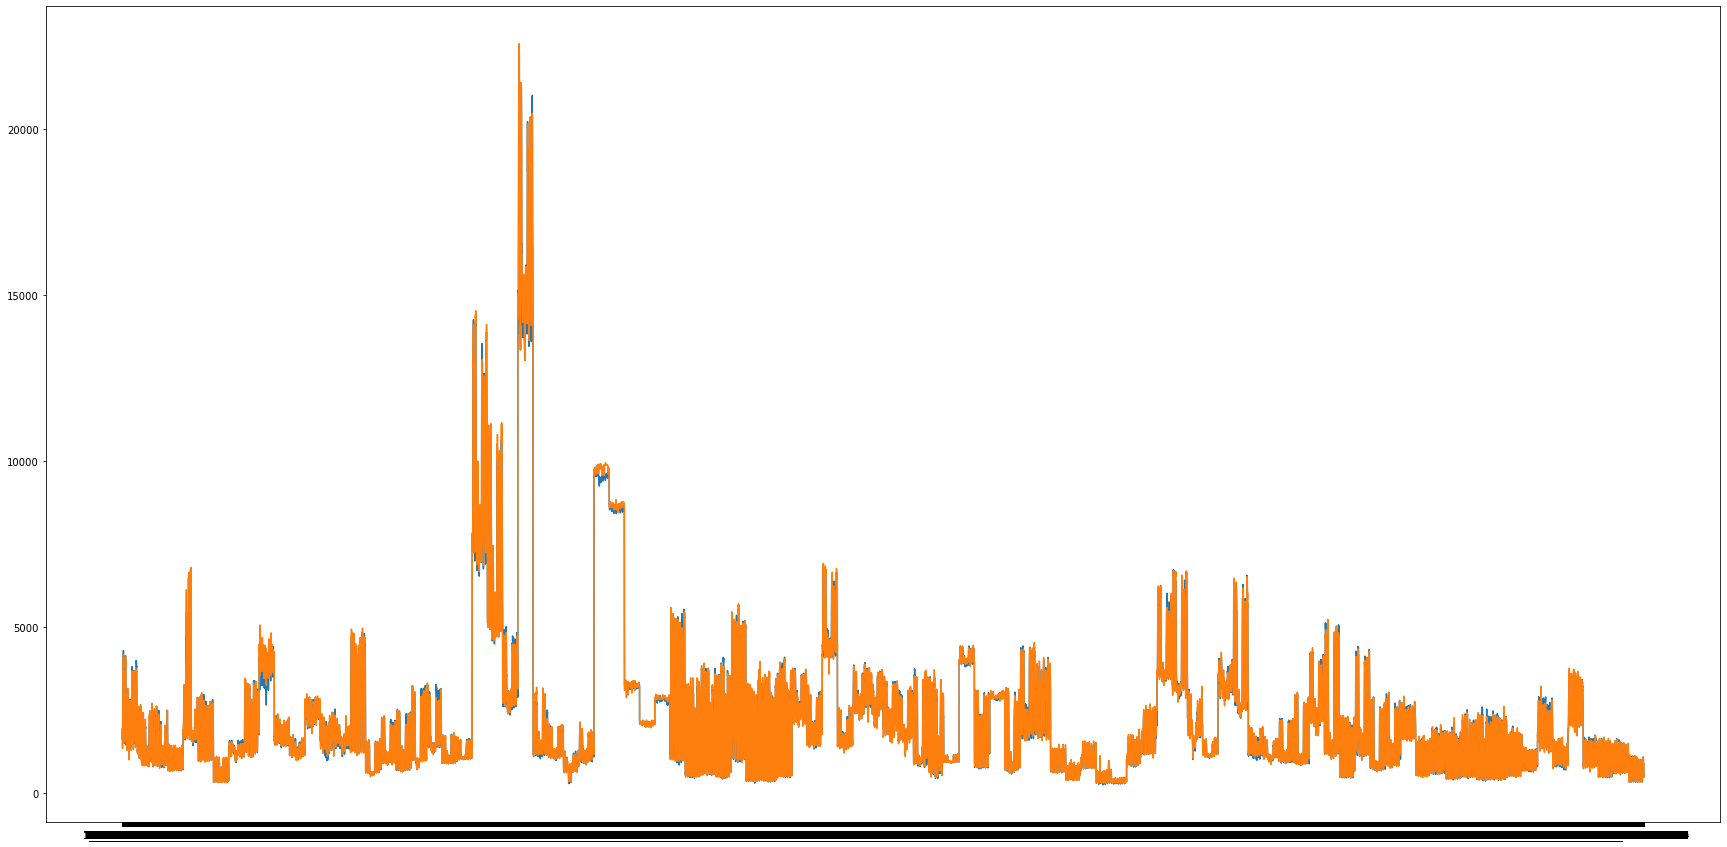

In [500]:
x = np.array(best['num_date_time'])
y = np.array(best['answer'])


x_ = np.array(update['num_date_time'])
y_ = np.array(update['answer'])

plt.figure(figsize = (30, 15))
plt.plot(x, y)
plt.plot(x_, y_)